In [3]:
!git clone https://github.com/rohnnie/NYU-Data-Science-Bootcamp-Spring-2025


Cloning into 'NYU-Data-Science-Bootcamp-Spring-2025'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 78 (delta 32), reused 59 (delta 19), pack-reused 0 (from 0)
Receiving objects: 100% (78/78), 15.96 MiB | 14.82 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [7]:
import pandas as pd
data = pd.read_csv('NYU-Data-Science-Bootcamp-Spring-2025/Week-6/employee.csv')


## Case : Build a model to predict the monthly salary of candidates

In [5]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

### Data Description

Column | Description
:---|:---
`id` | Record index
`timestamp` | Datetime (YYYY:MM:DD HH:MM:SS) when data was collected
`country` | Current country of employment
`employment_status` | Whether a candidate is Full time, Part time, Independent or freelancer or company owner
`job_title` | Current job title of the candidate
`job_years` | Total job experience (in Years)
`is_manager` | Whether the candidate holds a managerial position or not (Yes or No)
`hours_per_week` | No. of hours per day committed to the current job
`telecommute_days_per_week` | No. of telecommuting days per week (working from home)
`education` | The highest degree in education the candidate has received
`is_education_computer_related` | Is the education related to the field of computer science (Yes or No)
`certifications` | Does the candidate have any relevant certifications (Yes or No)
`salary` | Monthly Salary (in US $$)

In [ ]:
# Dataset is already loaded below
# data = pd.read_csv("employee.csv")

In [8]:
# Dimensions of training data
data.shape

(4277, 13)

In [9]:
# Print first few rows of data
data.head()

,id,timestamp,country,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,1,12/11/2018 10:52:26,Slovenia,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,2,1/5/2017 16:57:50,United States,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,3,12/18/2017 8:13:15,Sweden,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,4,12/27/2018 4:56:52,United States,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,5,12/11/2018 14:07:58,United States,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [10]:
# drop id, timestamp and country columns
data = data.drop(columns=['id', 'timestamp','country'])

In [11]:
# Explore columns
data.columns

Index(['employment_status', 'job_title', 'job_years', 'is_manager',
       'hours_per_week', 'telecommute_days_per_week', 'education',
       'is_education_computer_related', 'certifications', 'salary'],
      dtype='object')

In [12]:
# replace NANs in hours_per_week with median value of the column
data.loc[data['hours_per_week'].isna(), 'hours_per_week'] = data['hours_per_week'].median()
data.loc[data['telecommute_days_per_week'].isna(), 'telecommute_days_per_week'] = data['telecommute_days_per_week'].median()

In [13]:
#Handling null values in categorical columns
data = data.dropna()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4261 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   employment_status              4261 non-null   object 
 1   job_title                      4261 non-null   object 
 2   job_years                      4261 non-null   float64
 3   is_manager                     4261 non-null   object 
 4   hours_per_week                 4261 non-null   float64
 5   telecommute_days_per_week      4261 non-null   float64
 6   education                      4261 non-null   object 
 7   is_education_computer_related  4261 non-null   object 
 8   certifications                 4261 non-null   object 
 9   salary                         4261 non-null   float64
dtypes: float64(4), object(6)
memory usage: 366.2+ KB


### Data Visualization :

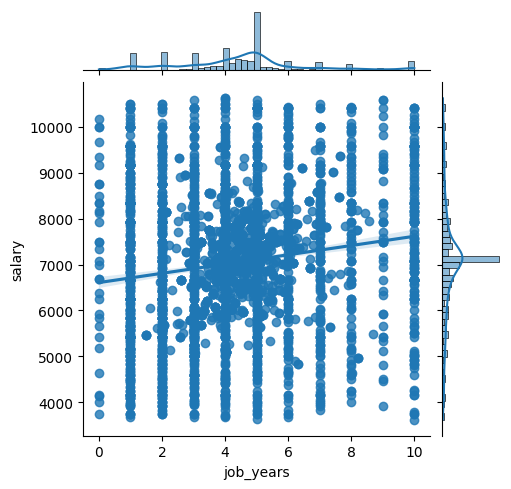

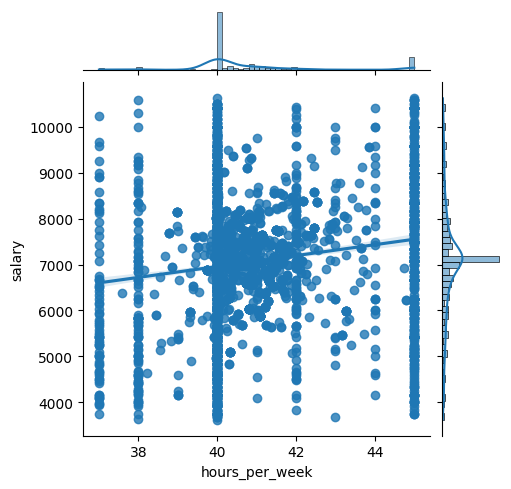

In [15]:
# joint plots for numeric variables

cols = ["job_years", "hours_per_week"]
for c in cols:
    sns.jointplot(x=c, y="salary", data=data, kind = 'reg', height = 5)
plt.show()

From the plots above we can clearly see that job_years has a relation with salary. The more job_years means more monthly earning(salary). Similar trend is visible for hours_per_week variable in relation to the target variable (salary)

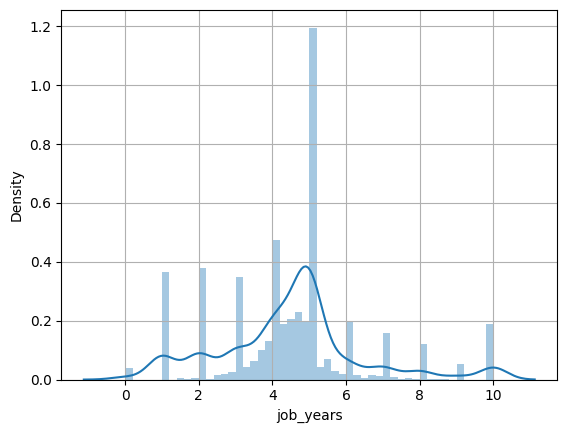

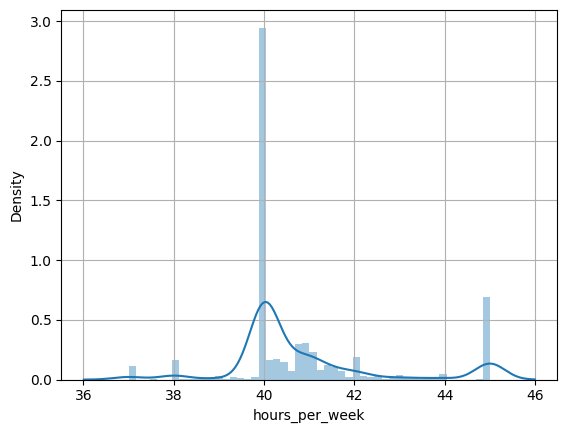

In [16]:
cols = ["job_years", "hours_per_week"]
for c in cols:
    sns.distplot(data[c])
    plt.grid()
    plt.show()

The distributions plotted above are interesting. For job_years, we see a slightly skewed distribution which shows that majority of professionals in our data have less than 10 years of total job experience. For hours_per_week we see a somewhat bimodal distribution ( 2 peaks) showing that most people work from 40 to 45 hours per week.

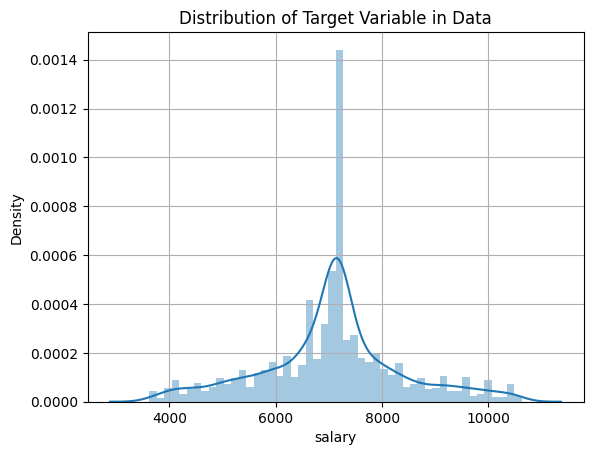

max: 10625.0
min: 3622.0


In [17]:
# distribution of target variable
sns.distplot(data['salary'])
plt.grid()
plt.title('Distribution of Target Variable in Data')
plt.show()
print('max:', np.max(data['salary']))
print('min:', np.min(data['salary']))

## Feature Encoding and Normalization

Before training the model, we should perform one-hot encoding for all categorical/discrete variables, normalize continuous variables and then combine all data to form the training set.

In [18]:
# create another copy of dataset and append encoded features to it
data_train = data.copy()
data_train.head()

,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [19]:
# select categorical features
cat_cols = [c for c in data_train.columns if data_train[c].dtype == 'object'
            and c not in ['is_manager', 'certifications']]
cat_data = data_train[cat_cols]
cat_cols

['employment_status',
 'job_title',
 'education',
 'is_education_computer_related']

In [20]:
#Encoding binary variables
binary_cols = ['is_manager', 'certifications']
for c in binary_cols:
    data_train[c] = data_train[c].replace(to_replace=['Yes'], value=1)
    data_train[c] = data_train[c].replace(to_replace=['No'], value=0)

In [21]:
final_data = pd.get_dummies(data_train, columns=cat_cols, drop_first= True,dtype=int)
final_data.shape

(4261, 25)

In [22]:
final_data.columns

Index(['job_years', 'is_manager', 'hours_per_week',
       'telecommute_days_per_week', 'certifications', 'salary',
       'employment_status_Independent or freelancer or company owner',
       'employment_status_Part time', 'job_title_Analytics consultant',
       'job_title_Architect', 'job_title_DBA', 'job_title_Data Scientist',
       'job_title_Developer', 'job_title_Engineer', 'job_title_Manager',
       'job_title_Other', 'job_title_Principal database engineer',
       'job_title_Sales', 'job_title_Sr Consultant ',
       'education_Bachelors (4 years)', 'education_Doctorate/PhD',
       'education_Masters', 'education_None (no degree completed)',
       'is_education_computer_related_Unknown',
       'is_education_computer_related_Yes'],
      dtype='object')

In [23]:
final_data

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,salary,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
0,4.783930,1,40.0,0.0,0,7187.743094,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,5.000000,0,40.0,5.0,0,10000.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1.000000,0,40.0,0.0,1,7000.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1.000000,0,40.0,2.0,0,8333.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3.000000,0,40.0,2.0,1,7137.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,2.000000,1,40.0,0.0,0,4917.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4273,4.140793,1,40.0,0.0,0,7033.845701,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4274,5.000000,0,40.0,0.0,0,7166.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4275,4.000000,1,40.0,2.0,0,9583.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


## Train Test Split

In [24]:
y = final_data['salary']
X = final_data.drop(columns=['salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (3408, 24)
Validation Set Dimensions: (853, 24)


## Pre-processing data

In [25]:
# select numerical features
num_cols = ['job_years','hours_per_week','telecommute_days_per_week']
num_cols


['job_years', 'hours_per_week', 'telecommute_days_per_week']

In [26]:
# Apply standard scaling on numeric data
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])

In [27]:
X_train

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
2924,-0.240907,0,-0.486253,-0.004331,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2484,0.167120,1,0.122356,0.610624,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2570,0.212162,0,-0.073533,-0.619286,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2566,0.258582,0,-0.486253,0.610624,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2844,0.231167,0,-0.403112,-0.619286,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,-0.167619,0,0.063118,-0.619286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1248,0.469077,1,-0.631496,-0.619286,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3941,-0.240907,0,-0.486253,-0.004331,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
123,1.757050,0,-0.486253,-0.619286,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [28]:
#Fitting a Linear Regression Model
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [29]:
reg.coef_

array([ 1.75733845e+02,  2.20764522e+01,  2.03591188e+02,  2.34040526e+02,
        8.23434081e+01, -1.97821339e+02,  1.13375901e+02, -1.47792889e-12,
        1.11106641e+03,  7.97191270e+02,  6.37331966e+02,  5.21401825e+02,
        9.06638559e+02,  8.05419090e+02,  2.01591789e+01,  9.18379057e+02,
        6.75643280e+02,  3.45648822e+03,  3.40266268e+02, -4.76067755e+01,
        2.15935023e+02,  1.98284643e+02, -2.65245181e+02, -1.81154814e+02])

In [30]:
reg.intercept_

np.float64(6204.659063675449)

In [31]:
# Normalized MSE (Dividing by mean)
mean_squared_error(y_train,reg.predict(X_train))/np.mean(y_train)

np.float64(211.20648868122566)

In [32]:
# Predict on the test data
y_pred = reg.predict(X_test)

In [33]:
#Evaluate the model on test data
mse = mean_squared_error(y_pred, y_test)/np.mean(y_test)
print("Mean Squared Error:", mse)


Mean Squared Error: 12746.550895821145


In [35]:



import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print('Evaluation on hold‑out test set')
print(f'MAE : {mae:.2f}')
print(f'RMSE: {np.sqrt(mse):.2f}')
print(f'R²  : {r2:.3f}')


pred_df = X_test.copy()
pred_df['Actual Salary']    = y_test.values
pred_df['Predicted Salary'] = y_pred

display(pred_df.head())

pred_df.to_csv('salary_predictions.csv', index=False)
joblib.dump(model, 'linreg_salary_model.joblib')
print('✓ Saved salary_predictions.csv and linreg_salary_model.joblib')


Evaluation on hold‑out test set
MAE : 9397.18
RMSE: 9476.75
R²  : -52.958


,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes,Actual Salary,Predicted Salary
4118,5.000000,0,40.000000,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,7166.000000,16609.371743
1951,3.742119,0,40.434222,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,6864.112390,16364.505176
2779,3.000000,0,40.000000,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3741.000000,15489.797611
263,3.407156,0,41.405997,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,6525.943555,16177.319343
2903,2.000000,0,40.000000,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,4000.000000,14941.229132


✓ Saved salary_predictions.csv and linreg_salary_model.joblib
